<a href="https://colab.research.google.com/github/okayhrm/eda-dsc/blob/main/datanalysisDSC_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Started on 12-09-2023 at 5:00pm

In [6]:
df = pd.read_excel('/content/drive/MyDrive/dsc.xlsx')
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Total_Marks(300)
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,215
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,221
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,196
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,239
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,226
...,...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low,237
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low,237
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low,243
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High,252


**ABOUT THE DATASET**

1.   This dataset consists of students and their performance in exams
2.   It also consists of information such as hrs studied and total marks(added by me)
3. The dataset has 5000 recors and 11 categories






Name: Name of the student

Age: Age of the stduent

Gender: Gender of the student

Hours_Studied: Hours studied per day on an average

IQ: The intellginece quotient of a person

Physics_Marks: Marks in physics subject

Maths_Marks: Marks in maths subject

Chemistry_Marks: Marks in chemistry subject

Has_Part_Time_Job: Performs a part time

Study_Hours_Group: Studied for how long/ if the numbers are high or low

Total_Marks(300): Its the total marks out of 300 ie usm of marks in maths,physics and chemistry.




In [7]:
print(df.describe())


               Age  Hours_Studied           IQ  Physics_Marks   Math_Marks  \
count  5000.000000    5000.000000  5000.000000    5000.000000  5000.000000   
mean     31.444800       5.499279   114.915200      70.311000    69.816000   
std       8.148388       2.588333    20.551839      17.753538    17.536626   
min      18.000000       1.002452    80.000000      40.000000    40.000000   
25%      24.000000       3.258910    97.000000      55.000000    54.000000   
50%      32.000000       5.474256   115.000000      71.000000    70.000000   
75%      38.000000       7.726088   133.000000      86.000000    85.000000   
max      45.000000       9.999925   150.000000     100.000000   100.000000   

       Chemistry_Marks  Total_Marks(300)  
count      5000.000000       5000.000000  
mean         69.798800        209.925800  
std          17.487913         30.413998  
min          40.000000        125.000000  
25%          55.000000        189.000000  
50%          70.000000        210.00000

Coming to the data analysis part. I have selected few topics which seemed intersting to me.

1. What is the distribution of IQ scores
2. Is there a correlation between hours of study and marks in each subject
3. Is there a gender-based difference in academic performance or study habits?
4. Are there any students who consistently perform poorly/excellently  in all three subjects?
5. Is there a relationship between part-time jobs and study hours or academic performance
6. Are there differences in the study habits and performance of students with high and low IQ scores


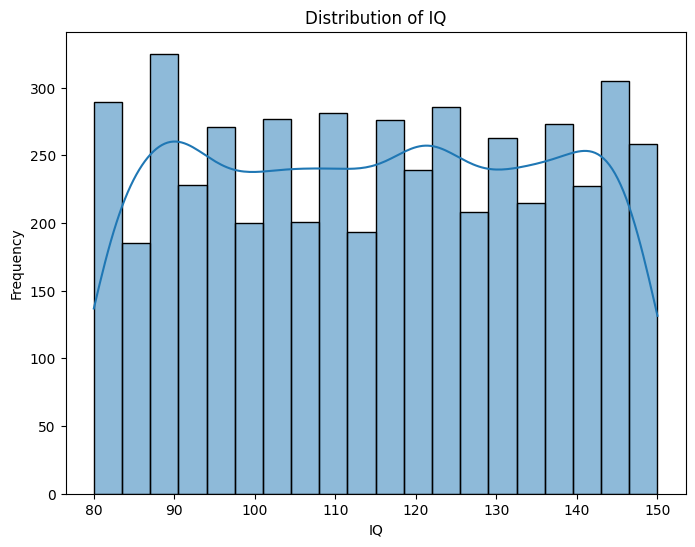

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['IQ'], bins=20, kde=True)
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.title('Distribution of IQ')
plt.show()

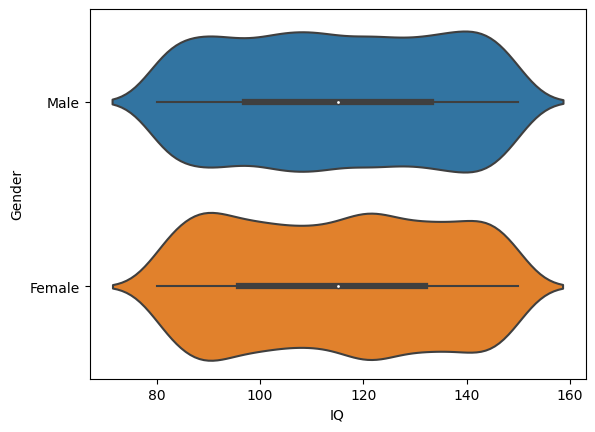

In [9]:

ax= sns.violinplot(x='IQ',y='Gender',data=df)

1) What is the distribution of IQ scores

Observation:
1. The average IQ is 114.
2. Majority of the students lie in the ranges of 85-90
3. The lowest recorded IQ is 80
4. The highest recorded IQ is 150
5. The violin plot above shows diversity of IQ in males and females
6. The plot also implies males and females dont differ in IQ which is true in actuality
---



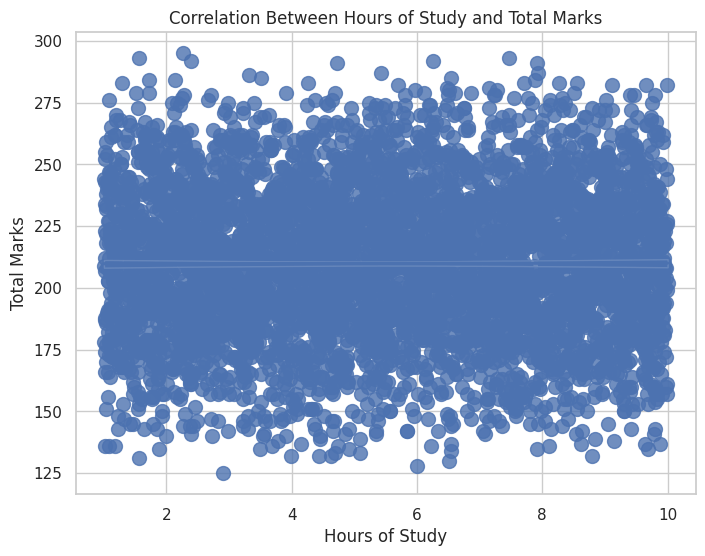

In [10]:
study_hours = df['Hours_Studied']
total_marks = df['Total_Marks(300)']
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))


sns.regplot(x=study_hours, y=total_marks, scatter_kws={"s": 100}, color='b')

plt.xlabel("Hours of Study")
plt.ylabel("Total Marks")
plt.title("Correlation Between Hours of Study and Total Marks")
plt.show()

In [17]:
import numpy as np
study_hours = df['Hours_Studied']
total_marks = df['Math_Marks']
correlation_coefficient = np.corrcoef(study_hours, total_marks)[0, 1]
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")

Pearson Correlation Coefficient: 0.01


2a. Maths

The pearson coefficient is 0.01. Thus there is no correlation between them

In [18]:
import numpy as np
from scipy.stats import pearsonr
study_hours = df['Hours_Studied']
total_marks = df['Physics_Marks']
correlation_coefficient, p_value = pearsonr(total_marks, study_hours)
correlation_coefficient = np.corrcoef(study_hours, total_marks)[0, 1]
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: -0.00
P-value: 0.9262


2b. Physics

The p-value is 0.9262 thus we cant reject the null hypothesis

No correlation

In [19]:
import numpy as np
study_hours = df['Hours_Studied']
total_marks = df['Chemistry_Marks']
correlation_coefficient, p_value = pearsonr(total_marks, study_hours)
correlation_coefficient = np.corrcoef(study_hours, total_marks)[0, 1]
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: -0.00
P-value: 0.9669


2c. Chemistry

The p-value is 0.9669 thus we cant reject the null hypothesis

No correlation


2) NO CORRELATION IS PRESENT BETWEEN MARKS AND HOURS STUDIED

In [ ]:

import scipy.stats as stats
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']
t_statistic, p_value = stats.ttest_ind(male_data['Marks'], female_data['Marks'])
alpha = 0.05
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value < alpha:
    print("There is a significant gender-based difference in academic performance.")
else:
    print("There is no significant gender-based difference in academic performance.")


3) gender-based difference in academic performance or study habits?

In [21]:
physics_marks = df['Physics_Marks']
maths_marks = df['Math_Marks']
chem_marks = df['Chemistry_Marks']
iq_scores = df['IQ']

students = df['Name']


cv_scores = []

for i in range(len(students)):
    student_scores = [physics_marks[i], maths_marks[i], chem_marks[i]]
    cv = np.std(student_scores) / np.mean(student_scores)
    cv_scores.append(cv)


threshold = 0.01


consistent_students = [students[i] for i in range(len(students)) if cv_scores[i] < threshold]

print("Students with almost the same marks in all subjects:")
for student in consistent_students:
    print(student)


Students with almost the same marks in all subjects:
Jill Ramirez
Meredith Richards
James Hanson
Francisco Parsons
Daniel Rodriguez
Stephen Jordan
Kyle Wallace
Toni Shepherd


In [22]:

filtered_data = []
for student, cv, physics, maths, chem, iq, study_hours in zip(students, cv_scores, physics_marks, maths_marks, chem_marks, iq_scores, study_hours):
    if cv < threshold:
        student_data = {
            "Student": student,
            "Physics Marks": physics,
            "Maths Marks": maths,
            "Chemistry Marks": chem,
            "IQ Score": iq,
            "Study Hours": study_hours,
        }
        filtered_data.append(student_data)
print("Students with almost the same marks in all subjects:")
for data in filtered_data:
    print(data)


Students with almost the same marks in all subjects:
{'Student': 'Jill Ramirez', 'Physics Marks': 49, 'Maths Marks': 49, 'Chemistry Marks': 50, 'IQ Score': 97, 'Study Hours': 6.53204376}
{'Student': 'Meredith Richards', 'Physics Marks': 93, 'Maths Marks': 94, 'Chemistry Marks': 95, 'IQ Score': 111, 'Study Hours': 9.648839068}
{'Student': 'James Hanson', 'Physics Marks': 88, 'Maths Marks': 89, 'Chemistry Marks': 88, 'IQ Score': 143, 'Study Hours': 1.108416385}
{'Student': 'Francisco Parsons', 'Physics Marks': 96, 'Maths Marks': 98, 'Chemistry Marks': 98, 'IQ Score': 117, 'Study Hours': 6.257856158}
{'Student': 'Daniel Rodriguez', 'Physics Marks': 78, 'Maths Marks': 77, 'Chemistry Marks': 77, 'IQ Score': 99, 'Study Hours': 2.940928414}
{'Student': 'Stephen Jordan', 'Physics Marks': 45, 'Maths Marks': 45, 'Chemistry Marks': 45, 'IQ Score': 84, 'Study Hours': 9.68055622}
{'Student': 'Kyle Wallace', 'Physics Marks': 62, 'Maths Marks': 62, 'Chemistry Marks': 61, 'IQ Score': 87, 'Study Hours'

4) Data of students who consistently perform poorly/excellently in all three subjects

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
part_time_students = df[df['Has_Part_Time_Job'] == 1]
non_part_time_students = df[df['Has_Part_Time_Job'] == 0]
t_statistic_marks, p_value_marks = stats.ttest_ind(part_time_students['Total_Marks(300)'], non_part_time_students['Total_Marks(300)'])
t_statistic_hours, p_value_hours = stats.ttest_ind(part_time_students['Hours_Studied'], non_part_time_students['Hours_Studied'])
alpha = 0.05
print(f"T-Statistic (Marks): {t_statistic_marks:.2f}")
print(f"P-Value (Marks): {p_value_marks:.4f}")
if p_value_marks < alpha:
    print("There is a significant difference in academic performance.")
else:
    print("There is no significant difference in academic performance.")
print(f"T-Statistic (Study Hours): {t_statistic_hours:.2f}")
print(f"P-Value (Study Hours): {p_value_hours:.4f}")
if p_value_hours < alpha:
    print("There is a significant difference in study hours.")
else:
    print("There is no significant difference in study hours.")



T-Statistic (Marks): 0.18
P-Value (Marks): 0.8566
There is no significant difference in academic performance.
T-Statistic (Study Hours): 0.21
P-Value (Study Hours): 0.8351
There is no significant difference in study hours.


5)Is there a relationship between part-time jobs and study hours or academic performance

In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
high_iq_threshold = 130
low_iq_threshold = 100
df['IQ_Group'] = np.where(df['IQ'] >= high_iq_threshold, 'High IQ', 'Low IQ')
t_statistic_marks, p_value_marks = stats.ttest_ind(
    df[df['IQ_Group'] == 'High IQ']['Total_Marks(300)'],
    df[df['IQ_Group'] == 'Low IQ']['Total_Marks(300)']
)
t_statistic_hours, p_value_hours = stats.ttest_ind(
    df[df['IQ_Group'] == 'High IQ']['Hours_Studied'],
    df[df['IQ_Group'] == 'Low IQ']['Hours_Studied']
)
alpha = 0.05
print(f"T-Statistic (Marks): {t_statistic_marks:.2f}")
print(f"P-Value (Marks): {p_value_marks:.4f}")
if p_value_marks < alpha:
    print("There is a significant difference in academic performance between high and low IQ groups.")
else:
    print("There is no significant difference in academic performance between high and low IQ groups.")
print(f"T-Statistic (Study Hours): {t_statistic_hours:.2f}")
print(f"P-Value (Study Hours): {p_value_hours:.4f}")
if p_value_hours < alpha:
    print("There is a significant difference in study hours between high and low IQ groups.")
else:
    print("There is no significant difference in study hours between high and low IQ groups.")



T-Statistic (Marks): -2.50
P-Value (Marks): 0.0125
There is a significant difference in academic performance between high and low IQ groups.
T-Statistic (Study Hours): -0.21
P-Value (Study Hours): 0.8301
There is no significant difference in study hours between high and low IQ groups.


differences in the study habits and performance of students with high and low IQ scores

That is all for this project :)